<a href="https://colab.research.google.com/github/QinnniQ/Functions/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


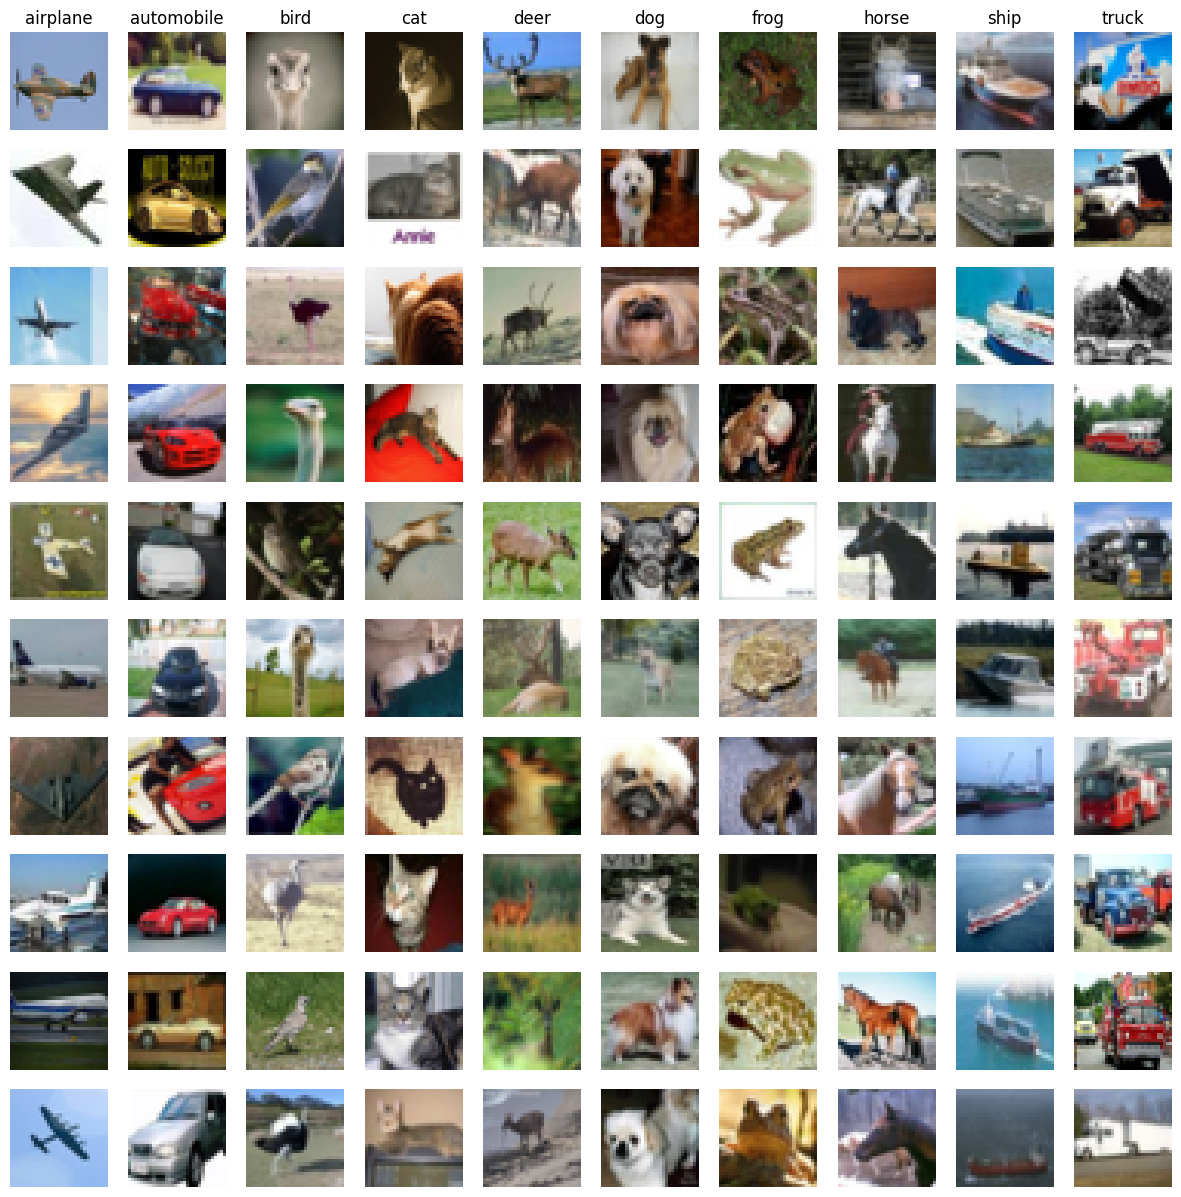

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 15))
num_classes = 10
samples_per_class = 10

for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session
clear_session()

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy'])

history = model.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_one_hot))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5710 - loss: 1.2401 - val_accuracy: 0.5569 - val_loss: 1.2616
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5707 - loss: 1.2290 - val_accuracy: 0.5343 - val_loss: 1.3163
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5638 - loss: 1.2446 - val_accuracy: 0.5595 - val_loss: 1.2578
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5765 - loss: 1.2208 - val_accuracy: 0.5473 - val_loss: 1.2736
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5788 - loss: 1.2117 - val_accuracy: 0.5535 - val_loss: 1.2648
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5793 - loss: 1.2078 - val_accuracy: 0.5365 - val_loss: 1.2988
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5786 - loss: 1.2077 - val_accuracy: 0.5658 - val_loss: 1.2345
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5887 - loss: 1.1923 - val_accuracy: 0.5654 - v

*   Plot the cross entropy loss curve and the accuracy curve

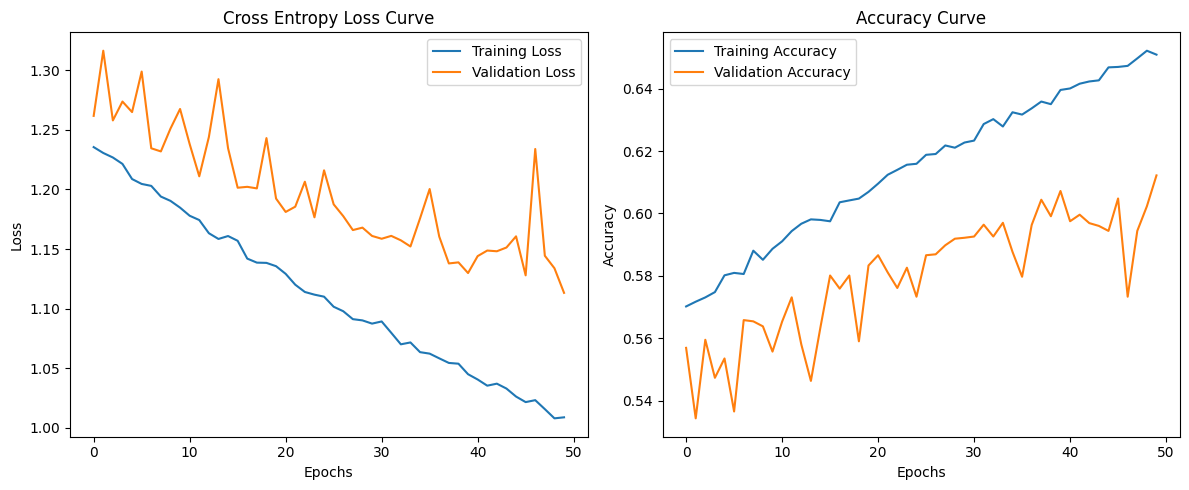

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import SGD

clear_session()

model_vgg = Sequential()

model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg.add(Flatten())

model_vgg.add(Dense(128, activation='relu'))

model_vgg.add(Dense(10, activation='softmax'))

model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy'])

model_vgg.summary()

history_vgg = model_vgg.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_one_hot))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.1723 - loss: 2.2599 - val_accuracy: 0.2624 - val_loss: 2.1147
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2660 - loss: 2.0725 - val_accuracy: 0.2843 - val_loss: 2.0014
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3073 - loss: 1.9752 - val_accuracy: 0.2810 - val_loss: 2.0034
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3362 - loss: 1.8949 - val_accuracy: 0.3537 - val_loss: 1.8380
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3558 - loss: 1.8357 - val_accuracy: 0.3620 - val_loss: 1.8058
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3707 - loss: 1.7981 - val_accuracy: 0.3785 - val_loss: 1.7741
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3818 - loss: 1.7629 - val_accuracy: 0.3939 - val_loss: 1.7247
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3947 - loss: 1.7329 - val_accuracy: 0.4121 - 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [16]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy'])
history_vgg = model_vgg.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_one_hot))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6336 - loss: 1.0563 - val_accuracy: 0.5968 - val_loss: 1.1332
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6392 - loss: 1.0386 - val_accuracy: 0.5948 - val_loss: 1.1495
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6407 - loss: 1.0331 - val_accuracy: 0.5961 - val_loss: 1.1400
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6472 - loss: 1.0152 - val_accuracy: 0.5901 - val_loss: 1.1605
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6461 - loss: 1.0153 - val_accuracy: 0.6001 - val_loss: 1.1409
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6496 - loss: 1.0057 - val_accuracy: 0.5940 - val_loss: 1.1648
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6511 - loss: 1.0048 - val_accuracy: 0.6070 - val_loss: 1.1245
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6567 - loss: 0.9873 - val_accuracy: 0.6026 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


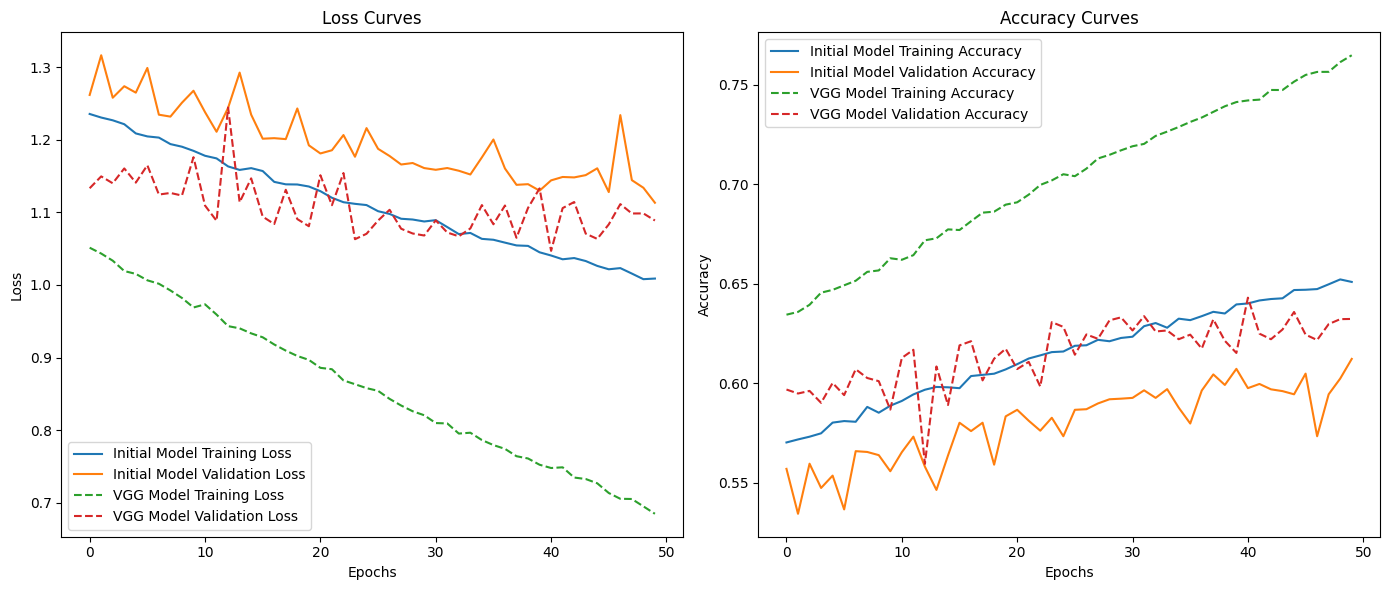

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Initial Model Training Loss')
plt.plot(history.history['val_loss'], label='Initial Model Validation Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model Training Loss', linestyle='--')
plt.plot(history_vgg.history['val_loss'], label='VGG Model Validation Loss', linestyle='--')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Initial Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Model Validation Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model Training Accuracy', linestyle='--')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model Validation Accuracy', linestyle='--')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

The VGG model is overfitting the training data


*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


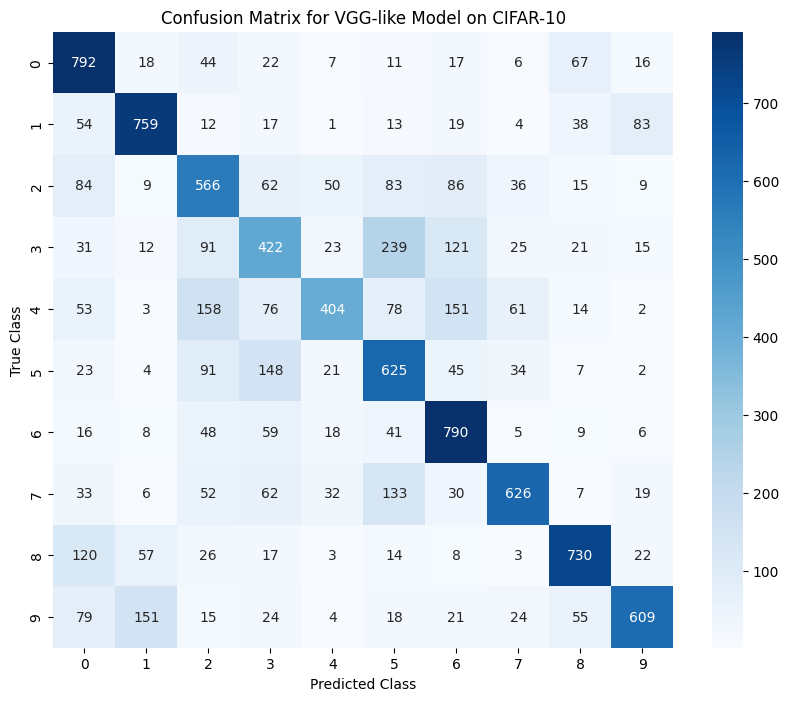

              precision    recall  f1-score   support

           0       0.62      0.79      0.69      1000
           1       0.74      0.76      0.75      1000
           2       0.51      0.57      0.54      1000
           3       0.46      0.42      0.44      1000
           4       0.72      0.40      0.52      1000
           5       0.50      0.62      0.55      1000
           6       0.61      0.79      0.69      1000
           7       0.76      0.63      0.69      1000
           8       0.76      0.73      0.74      1000
           9       0.78      0.61      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000



In [18]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = model_vgg.predict(x_test_normalized)

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix for VGG-like Model on CIFAR-10')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(classification_report(y_true_classes, y_pred_classes))

**Comment here :**

The higher values on the diagnol indidcare correct classifications.

A few sqaures outside of the diagnol have somewhat high scores, indicating class confusion.

*    Print the test accuracy for the trained model.

In [19]:
test_loss, test_accuracy = model_vgg.evaluate(x_test_normalized, y_test_one_hot, verbose=0)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 63.23%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session
clear_session()

In [21]:
model_vgg_complete = Sequential()

model_vgg_complete.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg_complete.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model_vgg_complete.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg_complete.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model_vgg_complete.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg_complete.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model_vgg_complete.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg_complete.add(Flatten())

model_vgg_complete.add(Dense(128, activation='relu'))

model_vgg_complete.add(Dense(10, activation='softmax'))

model_vgg_complete.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 767ms/step - accuracy: 0.1055 - loss: 2.3015 - val_accuracy: 0.1066 - val_loss: 2.2965
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.1156 - loss: 2.2946 - val_accuracy: 0.1480 - val_loss: 2.2848
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.1701 - loss: 2.2788 - val_accuracy: 0.2088 - val_loss: 2.2430
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.2124 - loss: 2.2149 - val_accuracy: 0.2628 - val_loss: 2.1093
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.2396 - loss: 2.1128 - val_accuracy: 0.2926 - val_loss: 1.9919
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2664 - loss: 2.0197 - val_accuracy: 0.2489 - val_loss: 2.0467
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.2883 - loss: 1.9682 - val_accuracy: 0.2840 - val_loss: 1.9939
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.3054 - loss: 1.9271 - val_acc

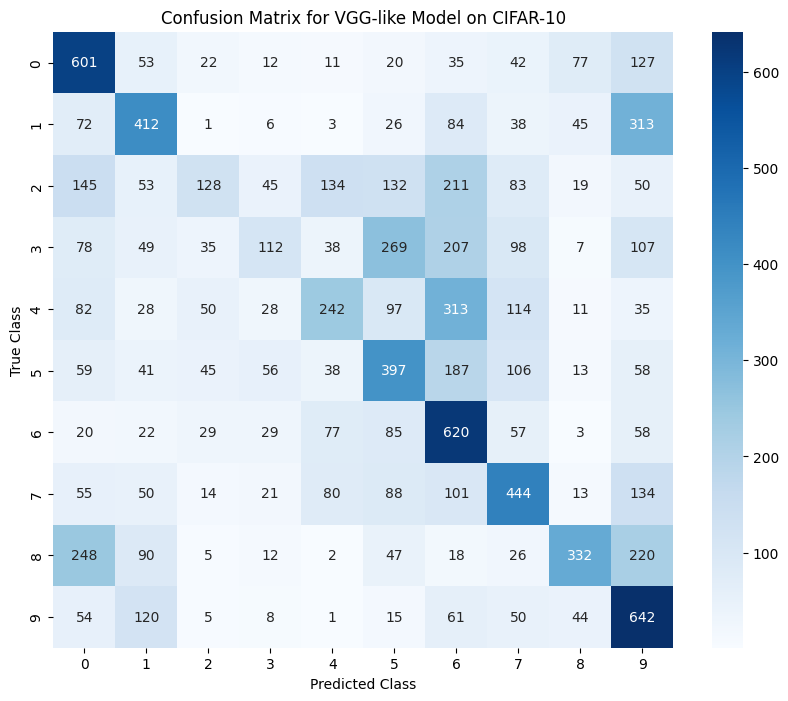

              precision    recall  f1-score   support

           0       0.43      0.60      0.50      1000
           1       0.45      0.41      0.43      1000
           2       0.38      0.13      0.19      1000
           3       0.34      0.11      0.17      1000
           4       0.39      0.24      0.30      1000
           5       0.34      0.40      0.36      1000
           6       0.34      0.62      0.44      1000
           7       0.42      0.44      0.43      1000
           8       0.59      0.33      0.42      1000
           9       0.37      0.64      0.47      1000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.37     10000
weighted avg       0.40      0.39      0.37     10000



In [22]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_resized = np.array([np.resize(image, (64, 64, 3)) for image in x_train])
x_test_resized = np.array([np.resize(image, (64, 64, 3)) for image in x_test])

x_train_normalized = x_train_resized.astype('float32') / 255.0
x_test_normalized = x_test_resized.astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

model_vgg_complete.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy'])

history_vgg_complete = model_vgg_complete.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=10,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_one_hot))

y_pred_probs = model_vgg_complete.predict(x_test_normalized)

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix for VGG-like Model on CIFAR-10')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(classification_report(y_true_classes, y_pred_classes))

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

They allow for models to work non-linearly.

_

2 - Key Differences between sigmoid and softmax:

Both are key activation functions, choosing between them often depends on the specifics of the classification problem (i.e. binary or multi-class).

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

They are both loss functions designed for different types of classification tasks (similar to the example above, binary vs multi-class).


_
